In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mlxtend.preprocessing import minmax_scaling
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn import cluster, preprocessing, decomposition
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
from jyquickhelper import add_notebook_menu
!pip install scikit-learn
!pip install yellowbrick
%matplotlib inline
sns.set_theme(palette="tab10")
# Validation code PEP8
%load_ext pycodestyle_magic
%pycodestyle_on

# Warnings
import warnings
from warnings import simplefilter

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


28:1: E402 module level import not at top of file
29:1: E402 module level import not at top of file


In [84]:
RFM = pd.read_csv('OLIST_data_client_clean.csv')

In [85]:
RFM

,customer_unique_id,rfm_recence,rfm_frequence,rfm_montant
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,2067.42
95416,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58
95417,ffff371b4d645b6ecea244b27531430a,573,1,112.46
95418,ffff5962728ec6157033ef9805bacc48,124,1,133.69


# Test des différents algorithmes

# KMeans

**Fonctionnement:**
L’algorithme K-means identifie un certain nombre de centroïdes dans un ensemble de données, un centroïde étant la moyenne arithmétique de tous les points de données appartenant à un cluster particulier.

L’algorithme attribue ensuite chaque point de données au cluster le plus proche en essayant de maintenir les clusters aussi petits que possible (le terme « means » dans K-means fait référence à la tâche consistant à faire la moyenne des données ou à trouver le centroïde).

Détermination de la valeur K (le nombre de clusters optimal)

La méthode d’Elbow:
Selon l’algorithme de K-Means, on doit définir au préalable le nombre K de clusters. Le problème qui se pose et de trouver un K optimal. L’une des méthodes les plus populaires pour y arriver est la méthode d’Elbow. Elle s’appuie sur la notion d’inertie. On définit cette dernière comme ceci : la somme des distances euclidiennes entre chaque point et son centroïde associé.

L’idée est d’exécuter le clustering k-means pour une gamme de clusters k et pour chaque valeur, nous calculons l’inertie intraclasse.

Lorsque l’on trace les distorsions et que le tracé ressemble à un bras, le « coude » (le point d’inflexion de la courbe) est la meilleure valeur de k.

Le coefficient de silhouette:
Une approche plus précise mais qui requiert plus de temps de calcul est le coefficient de silhouette. Il mesure la similitude d’un point de données à l’intérieur d’un groupe par rapport à d’autres groupes.

Ce coefficient peut varier entre -1 et +1. Un coefficient proche de +1 signifie que l’observation est située bien à l’intérieur de son propre cluster, tandis qu’un coefficient proche de 0 signifie qu’elle se situe près d’une frontière ; enfin, un coefficient proche de -1 signifie que l’observation est associée au mauvais cluster.

# Application sur les données (Recency, Frequency, Monetary) 

In [86]:
X = RFM[['rfm_recence', 'rfm_frequence', 'rfm_montant']]
X_scaled = preprocessing.StandardScaler().fit_transform(X)

**Nombre optimal de clusters K-Means**

**Coefficient de silhouette**

Le coefficient de silhouette est une mesure de qualité d'une partition d'un ensemble de données.

Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation).

Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien et il est donc mal classé.

A l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin et il est donc bien classé.

Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points.

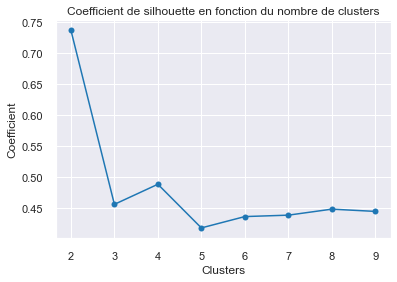

In [87]:
from sklearn.cluster import KMeans
silhouettes = []
for num_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X_scaled)
    silh = metrics.silhouette_score(X_scaled, kmeans.labels_)
    silhouettes.append(silh)

plt.plot(range(2, 10), silhouettes, marker='o')
plt.ylabel('Coefficient')
plt.xlabel('Clusters')
plt.title("Coefficient de silhouette en fonction du nombre de clusters")
plt.show()

**méthode du coude (elbow method)**

La méthode du coude permet de déterminer le nombre de clusters en observant la variation de la somme des carrés des distances intra-cluster en fonction du nombre de clusters.

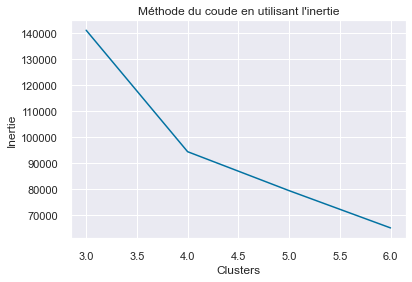

In [75]:
inertias = []
K = range(3, 7)

for num_clusters in K:
    cls = cluster.KMeans(n_clusters=num_clusters, random_state=0)
    cls.fit(X_scaled)

    inertias.append(cls.inertia_)

plt.plot(K, inertias, '-bx')
plt.xlabel('Clusters')
plt.ylabel('Inertie')
plt.title("Méthode du coude en utilisant l'inertie")
plt.show()

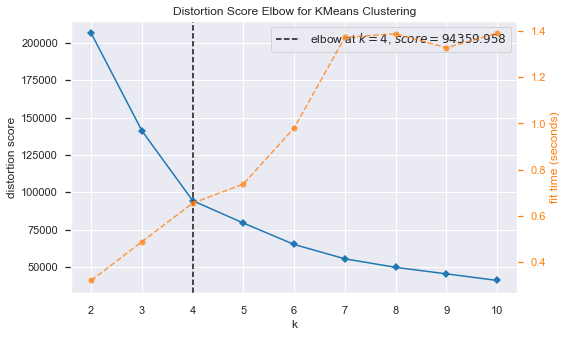

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
from yellowbrick.cluster import KElbowVisualizer

seed = 0
NCLUST = 11

model = KMeans(random_state=seed, init='k-means++')

fig = plt.figure(figsize=(8, 5))
visualizer = KElbowVisualizer(model, k=(2, NCLUST), timings=True)
visualizer.fit(X_scaled)
visualizer.show()

d'après le coefficient de silhouette et la méthode du coude on choisira 4 clusters (en fonction de la meilleure utilisation business)

In [107]:
# Créez K-Means avec 4 clusters:
kmeans = KMeans(n_clusters=4, random_state=0)
# Entraînez le modèle K-Means sur les données RFM:
kmeans.fit(X_scaled)
# Récuperer les étiquettes des clusters:
labels = kmeans.labels_

In [108]:
X_clustered = X.copy()
# Ajoutez les étiquettes de cluster à votre DataFrame:
X_clustered['Cluster'] = labels

# Visualisation

**Nombre de client par cluster**

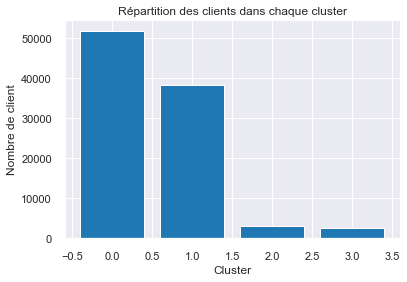

In [109]:
# Compter le nombre d'échantillons dans chaque cluster
cluster_counts = X_clustered['Cluster'].value_counts()

# Visualiser la répartition des échantillons dans chaque cluster
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Nombre de client')
plt.title('Répartition des clients dans chaque cluster')
plt.show()

**Distribution de chaque variable dans les differents clusters**

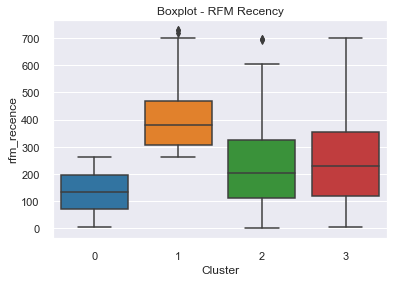

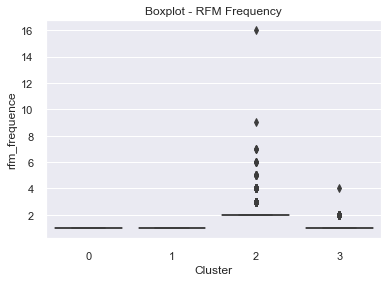

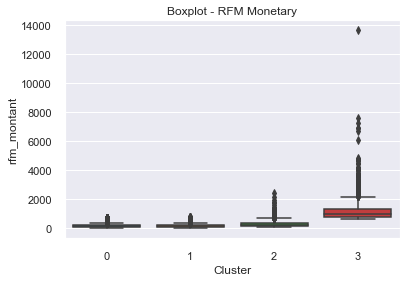

In [110]:
sns.boxplot(x='Cluster', y='rfm_recence', data=X_clustered)
plt.title('Boxplot - RFM Recency')
plt.show()

sns.boxplot(x='Cluster', y='rfm_frequence', data=X_clustered)
plt.title('Boxplot - RFM Frequency')
plt.show()

sns.boxplot(x='Cluster', y='rfm_montant', data=X_clustered)
plt.title('Boxplot - RFM Monetary')
plt.show()

**Distribution des variable dans chaque cluster**

In [111]:
cluster_0 = X_clustered[X_clustered['Cluster'] == 0]
cluster_1 = X_clustered[X_clustered['Cluster'] == 1]
cluster_2 = X_clustered[X_clustered['Cluster'] == 2]
cluster_3 = X_clustered[X_clustered['Cluster'] == 3]

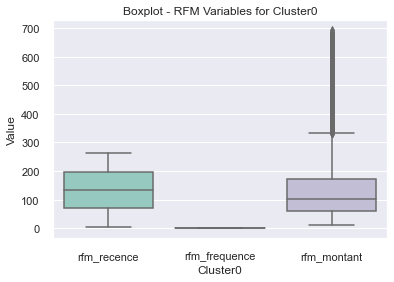

In [113]:
sns.boxplot(data=cluster_0[['rfm_recence', 'rfm_frequence', 'rfm_montant']],
            palette='Set3')
plt.title('Boxplot - RFM Variables for Cluster0')
plt.xlabel('Cluster0')
plt.ylabel('Value')
plt.show()

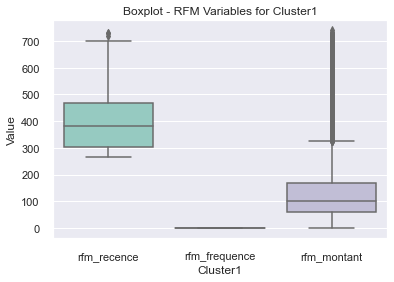

In [115]:
sns.boxplot(data=cluster_1[['rfm_recence', 'rfm_frequence', 'rfm_montant']],
            palette='Set3')
plt.title('Boxplot - RFM Variables for Cluster1')
plt.xlabel('Cluster1')
plt.ylabel('Value')
plt.show()

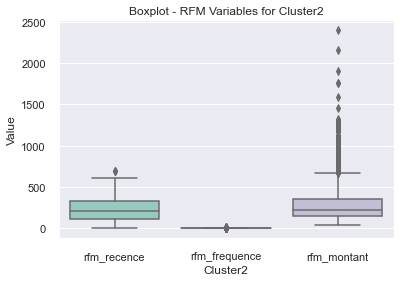

In [116]:
sns.boxplot(data=cluster_2[['rfm_recence', 'rfm_frequence', 'rfm_montant']],
            palette='Set3')
plt.title('Boxplot - RFM Variables for Cluster2')
plt.xlabel('Cluster2')
plt.ylabel('Value')
plt.show()

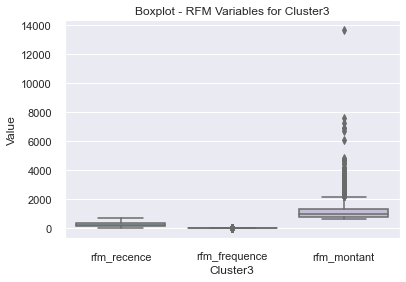

In [117]:
sns.boxplot(data=cluster_3[['rfm_recence', 'rfm_frequence', 'rfm_montant']],
            palette='Set3')
plt.title('Boxplot - RFM Variables for Cluster3')
plt.xlabel('Cluster3')
plt.ylabel('Value')
plt.show()

**Dispersion de combinaisons de deux variables rfm**

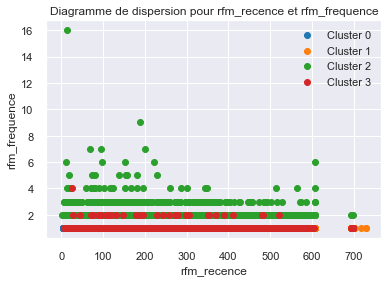

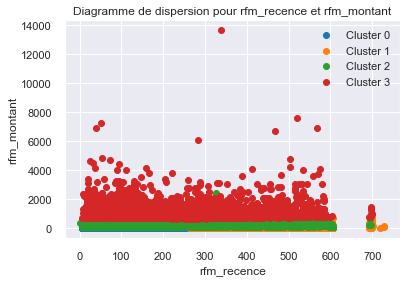

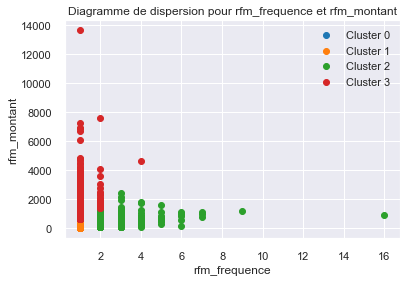

In [120]:
import itertools
import matplotlib.pyplot as plt

variables = ['rfm_recence', 'rfm_frequence', 'rfm_montant']

for idx, (variable_x, variable_y) in enumerate(itertools.combinations
                                               (variables, 2)):
    plt.figure(figsize=(6, 4))
    for cluster in X_clustered['Cluster'].unique():
        data = X_clustered[X_clustered['Cluster'] == cluster]
        if len(data) > 0:
            plt.scatter(data[variable_x], data[variable_y],
                        label=f'Cluster {cluster}')
    plt.xlabel(variable_x)
    plt.ylabel(variable_y)
    plt.title(f'Diagramme de dispersion pour {variable_x} et {variable_y}')
    plt.legend()
    plt.show()

**Moyenne des variables par cluster**

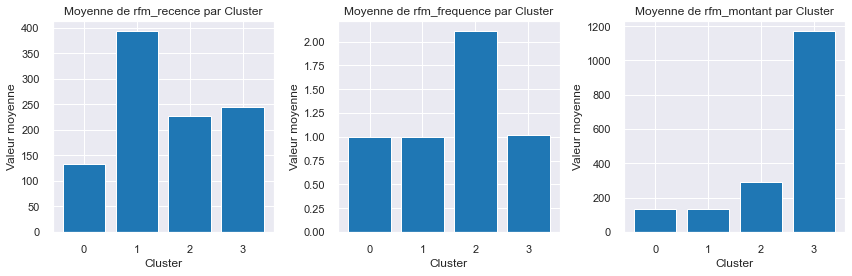

In [121]:
# Calculer les valeurs moyennes de chaque variable RFM par cluster
cluster_means = X_clustered.groupby('Cluster').mean()

# Créer un graphique en barres pour chaque variable RFM
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
variables = ['rfm_recence', 'rfm_frequence', 'rfm_montant']

for i, variable in enumerate(variables):
    ax = axes[i]
    ax.bar(cluster_means.index, cluster_means[variable])
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Valeur moyenne')
    ax.set_title(f'Moyenne de {variable} par Cluster')

plt.tight_layout()
plt.show()

# Caractéristiques des clusters

**Cluster 0** : le cluster qui regroupe le plus de clients. Ces client ont passé leurs commandes recement. La majorité d'entre eux ont commandé une seule fois et ils  ont dépensé peu.

**Cluster 1** : regroupe beaucoup de clients. Ces client ont passé leurs commandes il y a très longtemps. La majorité d'entre eux ont commandé une seule fois et ils  ont dépensé peu.

**Cluster 2** : regroupe peu de clients. Ces client ont passé leurs commandes il y a longtemps. La majorité d'entre eux ont commandé plus de deux fois en moyenne et ils  ont dépensé une somme moyenne.

**Cluster 3** : regroupe encore peu de clients. Ces client ont passé leurs commandes il y a longtemps. La majorité d'entre eux ont commandé plus d'une fois en moyenne et ils  ont dépensé une très grande somme.

# Application sur les données (Recency, Frequency, Monetary, Review_score)

**Récence** : nombre de jours depuis la dernière commande
    
**Fréquence**: le nombre de commandes différentes passées par le client

**Montant** : le montant total dépensé par clients
    
**Satisfaction** : on ajoute le critère de satisfaction client à la segmentation

In [122]:
data_commande = pd.read_csv('OLIST_data_commande_clean.csv')

In [123]:
# Copier le dataframe 'RFM' dans 'RFM_satisfaction'
RFM_satisfaction = RFM.copy()

In [124]:
# Ajouter la colonne 'satisfaction' au dataframe 'RFM'
RFM_satisfaction['satisfaction'] = data_commande['satisfaction']

In [125]:
RFM_satisfaction

,customer_unique_id,rfm_recence,rfm_frequence,rfm_montant,satisfaction
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4.0
2,0000f46a3911fa3c0805444483337064,542,1,86.22,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,4.0
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,5.0
...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,2067.42,5.0
95416,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,4.0
95417,ffff371b4d645b6ecea244b27531430a,573,1,112.46,5.0
95418,ffff5962728ec6157033ef9805bacc48,124,1,133.69,5.0


In [126]:
X = RFM_satisfaction[[
    'rfm_recence',
    'rfm_frequence',
    'rfm_montant',
    'satisfaction'
]]
X_scaled = preprocessing.StandardScaler().fit_transform(X)

**Nombre optimal de clusters K-Means**

**Coefficient de silhouette**

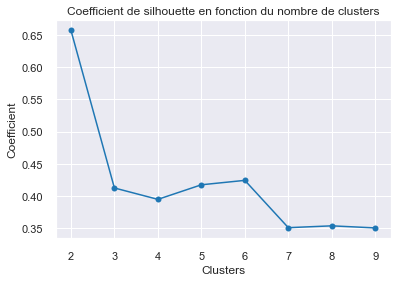

In [127]:
from sklearn.cluster import KMeans
silhouettes = []
for num_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X_scaled)
    silh = metrics.silhouette_score(X_scaled, kmeans.labels_)
    silhouettes.append(silh)

plt.plot(range(2, 10), silhouettes, marker='o')
plt.ylabel('Coefficient')
plt.xlabel('Clusters')
plt.title("Coefficient de silhouette en fonction du nombre de clusters")
plt.show()

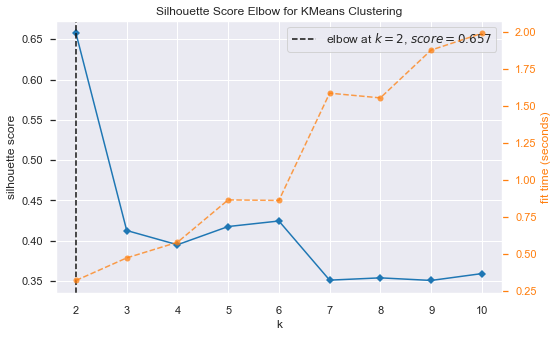

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [128]:
fig = plt.figure(figsize=(8, 5))

visualizer = KElbowVisualizer(model, k=(2, NCLUST), metric='silhouette',
                              timings=True)
visualizer.fit(X_scaled)
visualizer.show()

**méthode du coude (elbow method)**

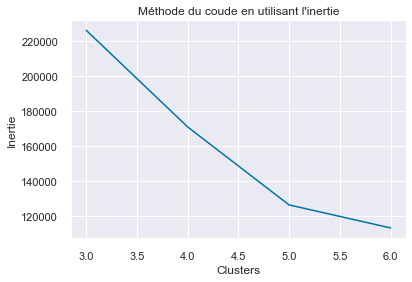

In [129]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(3, 7)

for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, '-bx')
plt.xlabel('Clusters')
plt.ylabel('Inertie')
plt.title("Méthode du coude en utilisant l'inertie")
plt.show()

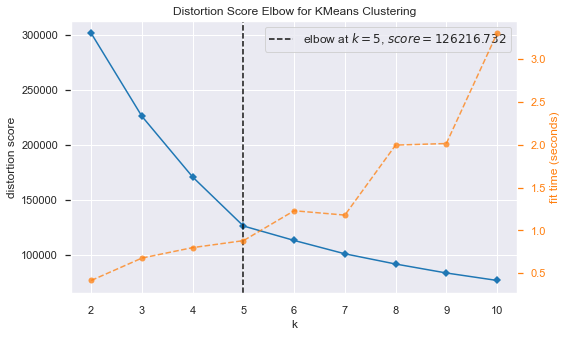

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [130]:
from yellowbrick.cluster import KElbowVisualizer

seed = 0
NCLUST = 11

model = KMeans(random_state=seed, init='k-means++')

fig = plt.figure(figsize=(8, 5))
visualizer = KElbowVisualizer(model, k=(2, NCLUST), timings=True)
visualizer.fit(X_scaled)
visualizer.show()

In [131]:
# Créez K-Means avec 5 clusters:
kmeans = KMeans(n_clusters=5, random_state=0)
# Entraînez le modèle K-Means sur les données RFM:
kmeans.fit(X_scaled)
# Récuperer les étiquettes des clusters:
labels = kmeans.labels_

In [132]:
X_clustered = X.copy()
# Ajoutez les étiquettes de cluster à votre DataFrame:
X_clustered['cluster'] = labels

**Nombre de client par cluster**

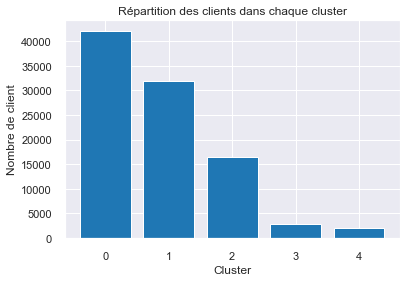

In [133]:
# Compter le nombre d'échantillons dans chaque cluster
cluster_counts = X_clustered['cluster'].value_counts()

# Visualiser la répartition des échantillons dans chaque cluster
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Nombre de client')
plt.title('Répartition des clients dans chaque cluster')
plt.show()

**Distribution de chaque variable dans les differents clusters**

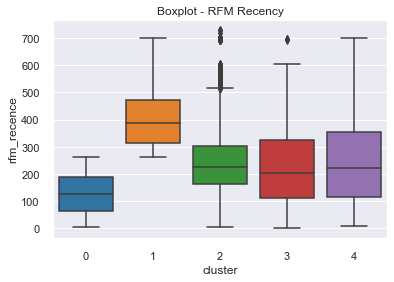

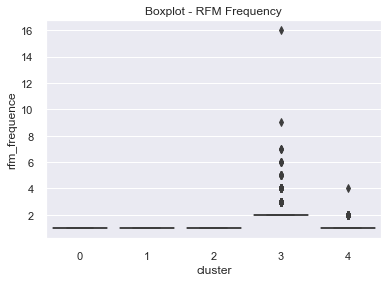

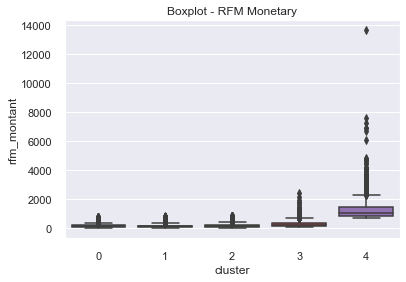

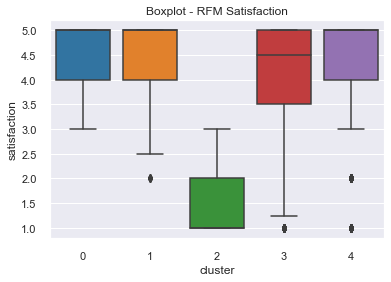

In [134]:
sns.boxplot(x='cluster', y='rfm_recence', data=X_clustered)
plt.title('Boxplot - RFM Recency')
plt.show()

sns.boxplot(x='cluster', y='rfm_frequence', data=X_clustered)
plt.title('Boxplot - RFM Frequency')
plt.show()

sns.boxplot(x='cluster', y='rfm_montant', data=X_clustered)
plt.title('Boxplot - RFM Monetary')
plt.show()

sns.boxplot(x='cluster', y='satisfaction', data=X_clustered)
plt.title('Boxplot - RFM Satisfaction')
plt.show()

**Distribution des variable dans chaque cluster**

In [135]:
cluster_0 = X_clustered[X_clustered['cluster'] == 0]
cluster_1 = X_clustered[X_clustered['cluster'] == 1]
cluster_2 = X_clustered[X_clustered['cluster'] == 2]
cluster_3 = X_clustered[X_clustered['cluster'] == 3]
cluster_4 = X_clustered[X_clustered['cluster'] == 4]

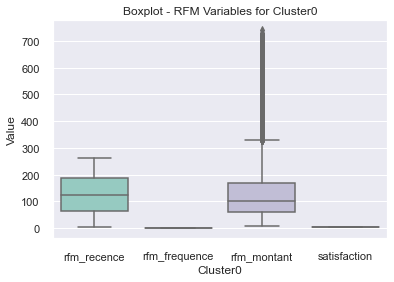

In [138]:
sns.boxplot(data=cluster_0[['rfm_recence', 'rfm_frequence',
                            'rfm_montant', 'satisfaction']], palette='Set3')
plt.title('Boxplot - RFM Variables for Cluster0')
plt.xlabel('Cluster0')
plt.ylabel('Value')
plt.show()

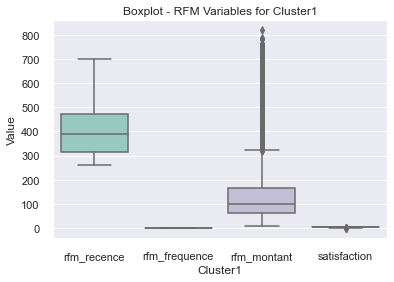

In [139]:
sns.boxplot(data=cluster_1[['rfm_recence', 'rfm_frequence', 'rfm_montant',
                            'satisfaction']], palette='Set3')
plt.title('Boxplot - RFM Variables for Cluster1')
plt.xlabel('Cluster1')
plt.ylabel('Value')
plt.show()

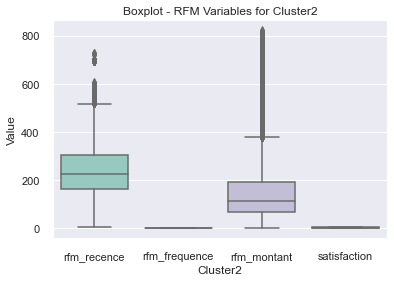

In [140]:
sns.boxplot(data=cluster_2[['rfm_recence', 'rfm_frequence', 'rfm_montant',
                            'satisfaction']], palette='Set3')
plt.title('Boxplot - RFM Variables for Cluster2')
plt.xlabel('Cluster2')
plt.ylabel('Value')
plt.show()

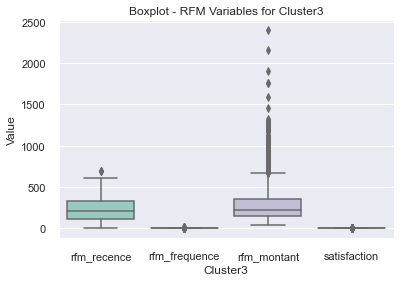

In [141]:
sns.boxplot(data=cluster_3[['rfm_recence', 'rfm_frequence', 'rfm_montant',
                            'satisfaction']], palette='Set3')
plt.title('Boxplot - RFM Variables for Cluster3')
plt.xlabel('Cluster3')
plt.ylabel('Value')
plt.show()

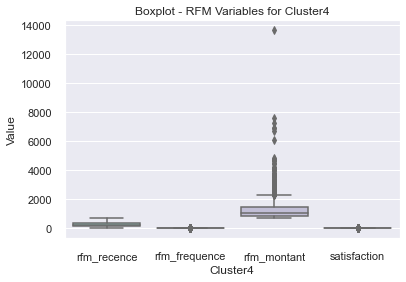

In [142]:
sns.boxplot(data=cluster_4[['rfm_recence', 'rfm_frequence', 'rfm_montant',
                            'satisfaction']], palette='Set3')
plt.title('Boxplot - RFM Variables for Cluster4')
plt.xlabel('Cluster4')
plt.ylabel('Value')
plt.show()

**Dispersion de combinaisons de deux variables rfm**

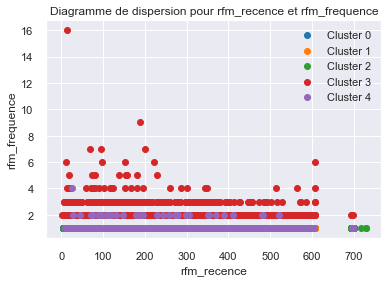

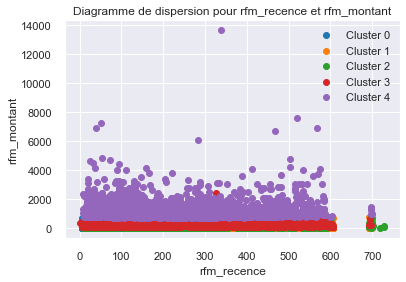

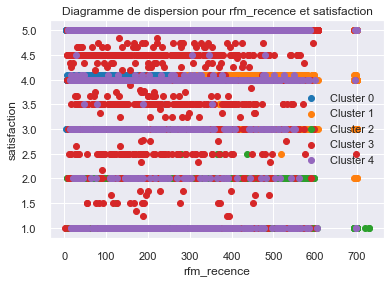

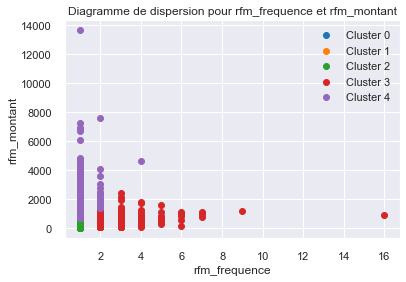

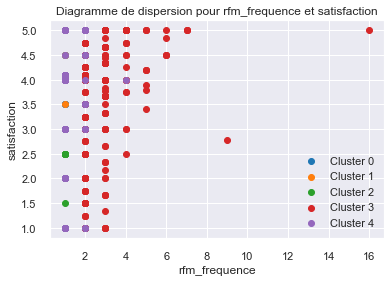

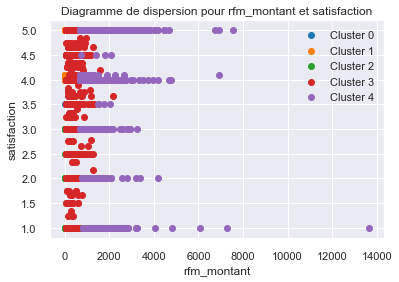

In [144]:
import itertools
import matplotlib.pyplot as plt

variables = ['rfm_recence', 'rfm_frequence', 'rfm_montant', 'satisfaction']

for idx, (variable_x, variable_y) in enumerate(itertools.combinations
                                               (variables, 2)):
    plt.figure(figsize=(6, 4))
    for cluster in X_clustered['cluster'].unique():
        data = X_clustered[X_clustered['cluster'] == cluster]
        if len(data) > 0:
            plt.scatter(data[variable_x], data[variable_y],
                        label=f'Cluster {cluster}')
    plt.xlabel(variable_x)
    plt.ylabel(variable_y)
    plt.title(f'Diagramme de dispersion pour {variable_x} et {variable_y}')
    plt.legend()
    plt.show()

**Moyenne des variables par cluster**

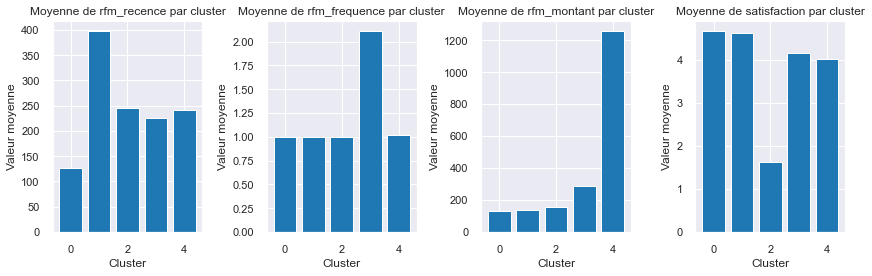

In [145]:
# Calculer les valeurs moyennes de chaque variable RFM par cluster
cluster_means = X_clustered.groupby('cluster').mean()

# Créer un graphique en barres pour chaque variable RFM
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
variables = ['rfm_recence', 'rfm_frequence', 'rfm_montant', 'satisfaction']

for i, variable in enumerate(variables):
    ax = axes[i]
    ax.bar(cluster_means.index, cluster_means[variable])
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Valeur moyenne')
    ax.set_title(f'Moyenne de {variable} par cluster')

plt.tight_layout()
plt.show()

# Caractéristiques des clusters
 
**Cluster 0** : le cluster qui regroupe le plus de clients. Ces client ont passé leurs commandes recement. La majorité d'entre eux ont commandé une seule fois et ils  ont dépensé peu, ils ont commenté plus de 4 fois.

**Cluster 1** : regroupe beaucoup de clients. Ces client ont passé leurs commandes il y a très longtemps. La majorité d'entre eux ont commandé une seule fois et ils  ont dépensé peu, ils ont commenté plus de 4 fois.

**Cluster 2** : regroupe un nombre moyen de clients. Ces client ont passé leurs commandes il y a longtemps. La majorité d'entre eux ont commandé juste une seule fois et ils ont dépensé une somme moyenne.ils ont commenté plus d'une fois

**Cluster 3** : regroupe très peu de clients. Ces client ont passé leurs commandes il y a il y a longtemps. La majorité d'entre eux ont commandé plus de deux fois en moyenne et ils ont dépensé une somme moyenne.ils ont commenté plus de 4 fois

**Cluster 4** : regroupe très peu de clients. Ces client ont passé leurs commandes il y a longtemps. La majorité d'entre eux ont commandé plus d'une fois en moyenne et ils ont dépensé une très grande somme.ils ont commenté plus de 4 fois 

# Application sur les données (Recency, Frequency, Monetary, Payment_sequential)

**Récence** : nombre de jours depuis la dernière commande

**Fréquence** : le nombre de commandes différentes passées par le client

**Montant** : le montant total dépensé par clients

**payment_sequential** : on ajoute le critère nombre de fois de payement à la segmentation

In [146]:
# Copier le dataframe 'RFM' dans 'RFM_satisfaction'
RFM_nbrdefoisdepayements = RFM.copy()

In [159]:
# Ajouter la colonne 'satisfaction' au dataframe 'RFM'
RFM_nbrdefoisdepayements['payment_sequential'] = \
    data_commande['payment_sequential']

In [160]:
X = RFM_nbrdefoisdepayements[['rfm_recence', 'rfm_frequence',
                              'rfm_montant', 'payment_sequential']]
X_scaled = preprocessing.StandardScaler().fit_transform(X)

**Nombre optimal de clusters K-Means**

**Coefficient de silhouette**

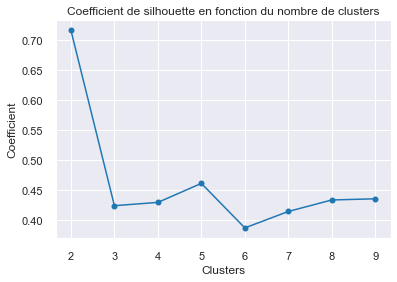

In [161]:
from sklearn.cluster import KMeans

silhouettes = []
for num_clusters in range(2, 10):
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans_model.fit(X_scaled)
    silh = metrics.silhouette_score(X_scaled, kmeans_model.labels_)
    silhouettes.append(silh)

plt.plot(range(2, 10), silhouettes, marker='o')
plt.ylabel('Coefficient')
plt.xlabel('Clusters')
plt.title("Coefficient de silhouette en fonction du nombre de clusters")
plt.show()

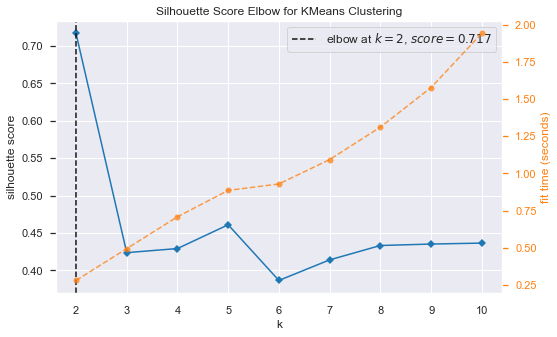

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [163]:
fig = plt.figure(figsize=(8, 5))
visualizer = KElbowVisualizer(model, k=(2, NCLUST), metric='silhouette',
                              timings=True)
visualizer.fit(X_scaled)
visualizer.show()

**méthode du coude (elbow method)**

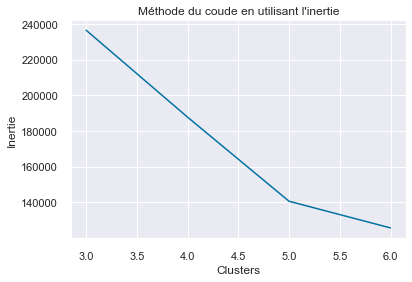

In [164]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(3, 7)

for num_clusters in K:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans_model.fit(X_scaled)
    inertias.append(kmeans_model.inertia_)

plt.plot(K, inertias, '-bx')
plt.xlabel('Clusters')
plt.ylabel('Inertie')
plt.title("Méthode du coude en utilisant l'inertie")
plt.show()

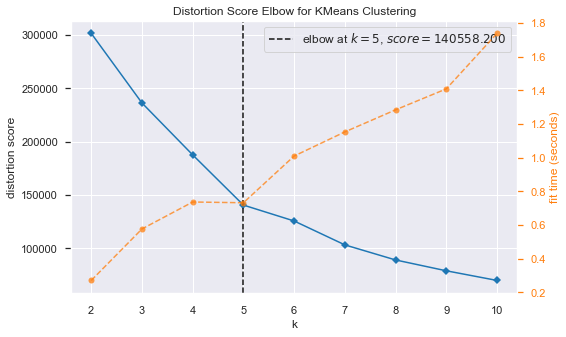

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [165]:
from yellowbrick.cluster import KElbowVisualizer

seed = 0
NCLUST = 11

model = KMeans(random_state=seed, init='k-means++')

fig = plt.figure(figsize=(8, 5))
visualizer = KElbowVisualizer(model, k=(2, NCLUST), timings=True)
visualizer.fit(X_scaled)
visualizer.show()

In [166]:
X_clustered = X.copy()
# Ajoutez les étiquettes de cluster à votre DataFrame:
X_clustered['cluster'] = labels

In [167]:
# Créez K-Means avec 5 clusters:
kmeans = KMeans(n_clusters=5, random_state=0)
# Entraînez le modèle K-Means sur les données RFM:
kmeans.fit(X_scaled)
# Récuperer les étiquettes des clusters attribuées
# à chaque point de données RFM :
labels = kmeans.labels_

**Nombre de client par cluster**

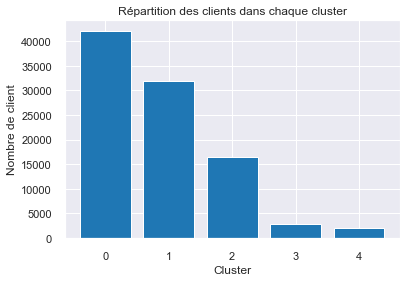

In [168]:
# Compter le nombre d'échantillons dans chaque cluster
cluster_counts = X_clustered['cluster'].value_counts()

# Visualiser la répartition des échantillons dans chaque cluster
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Nombre de client')
plt.title('Répartition des clients dans chaque cluster')
plt.show()

**Distribution de chaque variable dans les differents clusters**

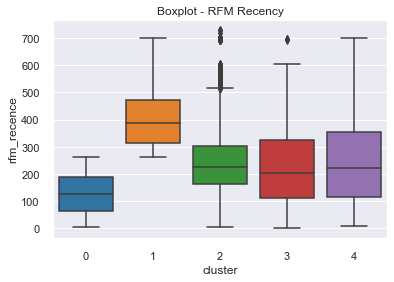

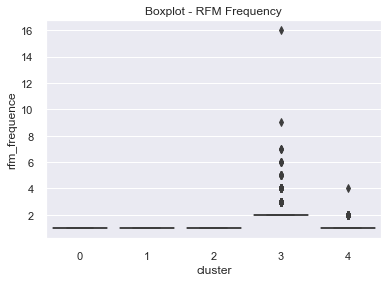

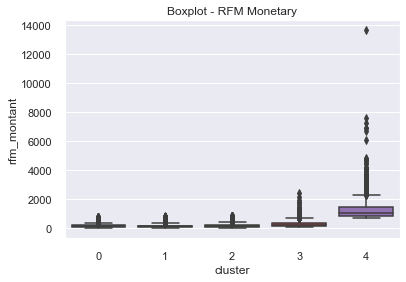

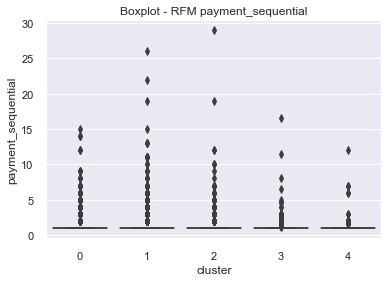

In [169]:
sns.boxplot(x='cluster', y='rfm_recence', data=X_clustered)
plt.title('Boxplot - RFM Recency')
plt.show()

sns.boxplot(x='cluster', y='rfm_frequence', data=X_clustered)
plt.title('Boxplot - RFM Frequency')
plt.show()

sns.boxplot(x='cluster', y='rfm_montant', data=X_clustered)
plt.title('Boxplot - RFM Monetary')
plt.show()

sns.boxplot(x='cluster', y='payment_sequential', data=X_clustered)
plt.title('Boxplot - RFM payment_sequential')
plt.show()

**Distribution des variable dans chaque cluster**

In [170]:
cluster_0 = X_clustered[X_clustered['cluster'] == 0]
cluster_1 = X_clustered[X_clustered['cluster'] == 1]
cluster_2 = X_clustered[X_clustered['cluster'] == 2]
cluster_3 = X_clustered[X_clustered['cluster'] == 3]
cluster_4 = X_clustered[X_clustered['cluster'] == 4]

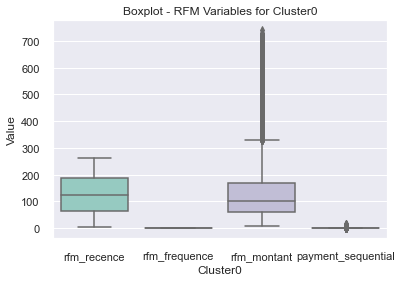

In [171]:
sns.boxplot(data=cluster_0[['rfm_recence', 'rfm_frequence', 'rfm_montant',
                            'payment_sequential']], palette='Set3')
plt.title('Boxplot - RFM Variables for Cluster0')
plt.xlabel('Cluster0')
plt.ylabel('Value')
plt.show()

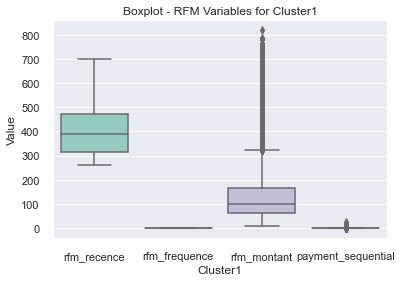

In [172]:
sns.boxplot(data=cluster_1[['rfm_recence', 'rfm_frequence', 'rfm_montant',
                            'payment_sequential']], palette='Set3')
plt.title('Boxplot - RFM Variables for Cluster1')
plt.xlabel('Cluster1')
plt.ylabel('Value')
plt.show()

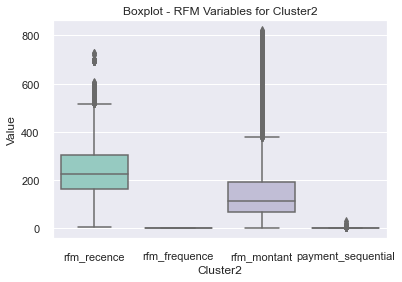

In [173]:
sns.boxplot(data=cluster_2[['rfm_recence', 'rfm_frequence', 'rfm_montant',
                            'payment_sequential']], palette='Set3')
plt.title('Boxplot - RFM Variables for Cluster2')
plt.xlabel('Cluster2')
plt.ylabel('Value')
plt.show()

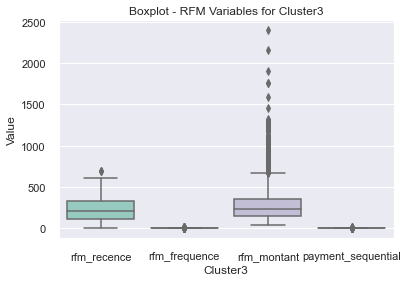

In [174]:
sns.boxplot(data=cluster_3[['rfm_recence', 'rfm_frequence', 'rfm_montant',
                            'payment_sequential']], palette='Set3')
plt.title('Boxplot - RFM Variables for Cluster3')
plt.xlabel('Cluster3')
plt.ylabel('Value')
plt.show()

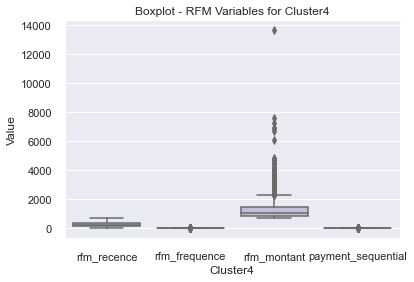

In [175]:
sns.boxplot(data=cluster_4[['rfm_recence', 'rfm_frequence', 'rfm_montant',
                            'payment_sequential']], palette='Set3')
plt.title('Boxplot - RFM Variables for Cluster4')
plt.xlabel('Cluster4')
plt.ylabel('Value')
plt.show()

**Dispersion de combinaisons de deux variables rfm**

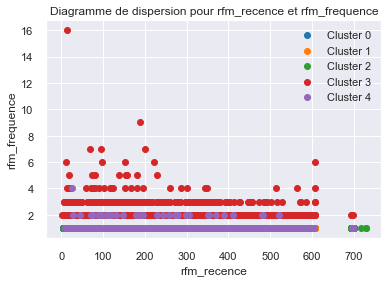

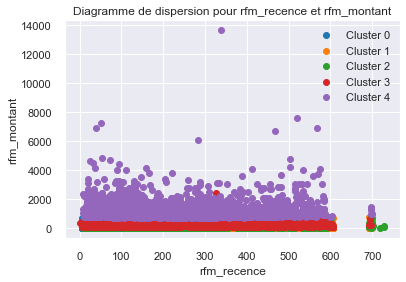

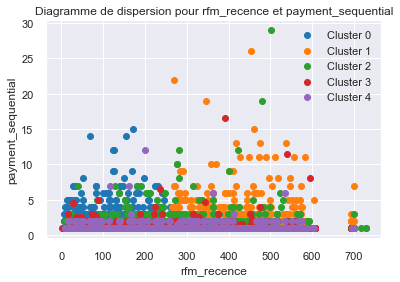

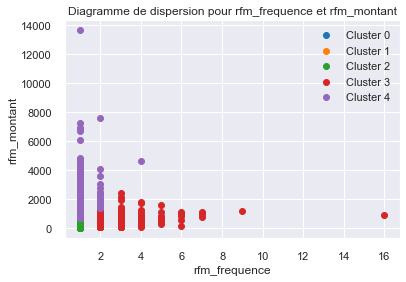

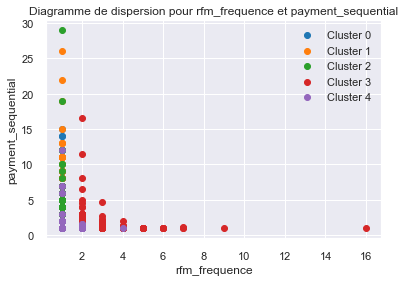

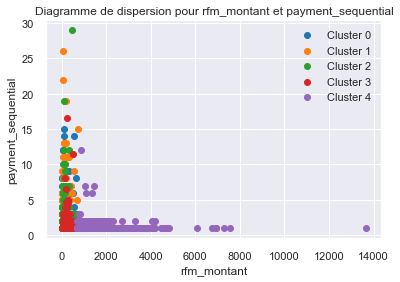

In [185]:
import itertools
import matplotlib.pyplot as plt

variables = ['rfm_recence', 'rfm_frequence', 'rfm_montant',
             'payment_sequential']

for idx, (variable_x, variable_y)\
 in enumerate(itertools.combinations(variables, 2)):
    plt.figure(figsize=(6, 4))
    for cluster in X_clustered['cluster'].unique():
        data = X_clustered[X_clustered['cluster'] == cluster]
        if len(data) > 0:
            plt.scatter(data[variable_x], data[variable_y],
                        label=f'Cluster {cluster}')
    plt.xlabel(variable_x)
    plt.ylabel(variable_y)
    plt.title(f'Diagramme de dispersion pour {variable_x} et {variable_y}')
    plt.legend()
    plt.show()

**Moyenne des variables par cluster**

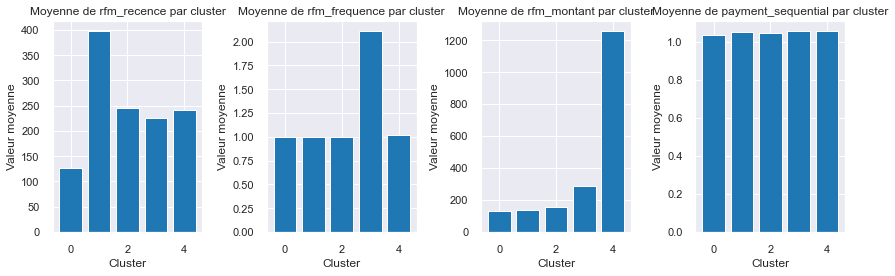

In [186]:
# Calculer les valeurs moyennes de chaque variable RFM par cluster
cluster_means = X_clustered.groupby('cluster').mean()

# Créer un graphique en barres pour chaque variable RFM
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
variables = ['rfm_recence', 'rfm_frequence', 'rfm_montant',
             'payment_sequential']

for i, variable in enumerate(variables):
    ax = axes[i]
    ax.bar(cluster_means.index, cluster_means[variable])
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Valeur moyenne')
    ax.set_title(f'Moyenne de {variable} par cluster')

plt.tight_layout()
plt.show()

# Caractéristiques des clusters
**Cluster 0** : regroupe le plus grand nombre de clients. Ces client ont passé leurs commandes recement. La majorité d'entre eux ont commandé juste une seule fois, ils ont dépensé une petite somme et ils ont  payé ont en plus d'une fois en moyenne.

**Cluster 1** : regroupe beaucoup de clients. Ces client ont passé leurs commandes il y a très longtemps. La majorité d'entre eux ont commandé juste une seule fois et ils ont dépensé une petite somme.ils ont  payé ont en plus d'une  fois en moyenne.

**Cluster 2** : regroupe un nombre moyen de clients. Ces client ont passé leurs commandes il y a longtemps. La majorité d'entre eux ont commandé juste une seule fois et ils ont dépensé une petite somme .ils ont  payé ont en plus d'une fois en moyenne.

**Cluster 3** : regroupe peu de clients. Ces client ont passé leurs commandes il y a longtemps. La majorité d'entre eux ont commandé plus de deux fois en moyenne et ils ont dépensé une somme moyenne.ils ont  payé ont en plus d'une  fois en moyenne.

**Cluster 4** : regroupe peu de clients. Ces client ont passé leurs commandes il y a longtemps en moyenne. La majorité d'entre eux ont commandé plus d'une fois en moyenne et ils ont dépensé environ une très grande somme.ils ont  payé ont en plus d'une fois en moyenne.

# Clustering par densité:

# DBSCAN

Le DBSCAN est un algorithme simple qui définit des clusters en utilisant l’estimation de la densité locale. On peut le diviser en 4 étapes :

Pour chaque observation on regarde le nombre de points à au plus une distance ε de celle-ci. On appelle cette zone le ε-voisinage de l’observation.

Si une observation compte au moins un certain nombre de voisins y compris elle-même, elle est considérée comme une observation cœur. On a alors décelé une observation à haute densité.

Toutes les observations au voisinage d’une observation cœur appartiennent au même cluster. Il peut y avoir des observations cœur proche les unes des autres. Par conséquent de proche en proche on obtient une longue séquence d’observations cœur qui constitue un unique cluster.

Toute observation qui n’est pas une observation cœur et qui ne comporte pas d’observation cœur dans son voisinage est considérée comme une anomalie.


On a donc besoin de définir deux informations avant d’utiliser le DBSCAN :


Quelle distance ε pour déterminer pour chaque observation le ε-voisinage ? Quel est le nombre minimal de voisins nécessaire pour considérer qu’une observation est une observation cœur ?


nous allons chercher à déterminer le ε optimal pour obtenir un meilleur partitionnement de notre jeu de données.

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [12]:
# Pour des questions de temps de calcul, on réduit le jeu de données de 80%.
RFM_sample = RFM.sample(frac=0.2, random_state=42)

In [13]:
RFM_sample

,customer_unique_id,rfm_recence,rfm_frequence,rfm_montant
49378,842bff27a9fd73c774aeb526d0f53113,330,1,63.70
56641,97e5be9a2f1841bc42b966aa2d014d13,162,1,118.72
56870,987f4716cef1294c01c4c0cb7b275ff1,143,1,200.17
6347,10e1df2717597281c5cffa0e0a7ca7cb,20,1,2225.69
40287,6baee3008124f2fd07c61fc8169ad485,187,1,285.63
...,...,...,...,...
29183,4e1ac19f79e722a08c3d9bf398cd6d62,120,1,66.33
59280,9edac7d8bdeeaa1858ad6d6d34bbd252,210,1,74.17
32428,56ca66bcf6d0b1a37817d2ad039eafdc,548,1,59.25
77803,d086d4375ebbeb67f775bbe337aff792,216,1,195.91


In [14]:
X_sample = RFM_sample[['rfm_recence', 'rfm_frequence', 'rfm_montant']]
X_sample_scaled = preprocessing.StandardScaler().fit_transform(X_sample)

In [15]:
db = DBSCAN(eps=0.5, min_samples=5).fit(X_sample_scaled)
labels_dbscan = db.labels_
# Nombre de clusters dans labels, en soustrayant le bruit si présent
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)
# Ajout des labels au dataframe 'RFM'
X_sample_clustered_dbscan = X_sample.copy()
X_sample_clustered_dbscan['labels_dbscan'] = db.labels_
print('Nombre de clusters : %d' % n_clusters)
print("Coefficient de silhouette : %0.3f" % metrics.silhouette_score(X_sample_scaled, labels_dbscan))

Nombre de clusters : 5


10:80: E501 line too long (101 > 79 characters)


Coefficient de silhouette : 0.470


Après avoir relancé l'algorithme plusieurs fois avec des paramètres différents, nous avons trouvé la meilleure solution avec les paramètres epsilon = 0.5 et min_samples = 5, avec 5 clusters un nombre beaucoup trop élevé pour donner un résultat exploitable d'un point de vue business. Nous allons essayer de rechercehr les meilleurs paramètres avec une boucle for.

**Recherche de paramètres optimales**

Nous allons chercher à optimiser la méthode DBSCAN en utilisant différents paramètres epsilon (eps) et min_samples afin d'obtenir un nombre raisonnable et interprétable de clusters. Afin d'automatiser la recherche, nous allons utiliser une boucle for :

In [16]:
from sklearn.metrics import silhouette_score

eps_list = [0.2, 0.3, 0.4, 0.5, 1]
min_samples_list = [5, 10, 20, 40, 50]

results_list = []

for eps in eps_list:
    for min_samples in min_samples_list:
        dbscan_iter = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_iter.fit(X_sample_scaled)

        results_list.append({
            "eps": eps,
            "min_samples": min_samples,
            "number_of_clusters": len(np.unique(dbscan_iter.labels_[dbscan_iter.labels_ != -1])),
            "silhouette_score": silhouette_score(X_sample_scaled, dbscan_iter.labels_),
        })

df_results = pd.DataFrame(results_list)

16:80: E501 line too long (97 > 79 characters)
17:80: E501 line too long (87 > 79 characters)


In [17]:
df_results

,eps,min_samples,number_of_clusters,silhouette_score
0,0.2,5,17,0.416024
1,0.2,10,4,0.416669
2,0.2,20,7,0.300808
3,0.2,40,1,0.636753
4,0.2,50,1,0.618791
5,0.3,5,8,0.446672
6,0.3,10,7,0.444436
7,0.3,20,3,0.473718
8,0.3,40,4,0.459302
9,0.3,50,3,0.377099


In [89]:
# Analysons les clusters obtenus pour cette combinaisons.

db = DBSCAN(eps=1, min_samples=10).fit(X_sample_scaled)
labels_dbscan = db.labels_
# Nombre de clusters dans labels, en soustrayant le bruit si présent
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)
# Ajout des labels au dataframe 'RFM'
X_sample_clustered_dbscan = X_sample.copy()
X_sample_clustered_dbscan['labels_dbscan'] = db.labels_
print('Nombre de clusters : %d' % n_clusters)
print("Coefficient de silhouette : %0.3f" % metrics.silhouette_score(X_sample_scaled, labels_dbscan))

Nombre de clusters : 3


12:80: E501 line too long (101 > 79 characters)


Coefficient de silhouette : 0.691


In [90]:
df_labels = pd.pivot_table(
    X_sample_clustered_dbscan,
    index=['labels_dbscan'],
    values=[
        "rfm_recence",
        "rfm_frequence",
        "rfm_montant",
    ],
    aggfunc={
        "rfm_recence": np.mean,
        "rfm_frequence": np.mean,
        "rfm_montant": np.mean,
    },
)
df_labels

,rfm_frequence,rfm_montant,rfm_recence
labels_dbscan,,,
-1,2.44,2195.681600,248.680000
0,1.00,156.895327,243.780810
1,3.00,291.115667,202.966667
2,2.00,263.328134,227.279851


In [91]:
cluster_counts = X_sample_clustered_dbscan['labels_dbscan'].value_counts()
cluster_counts

 0    18468
 2      536
-1       50
 1       30
Name: labels_dbscan, dtype: int64

**Visualisation**

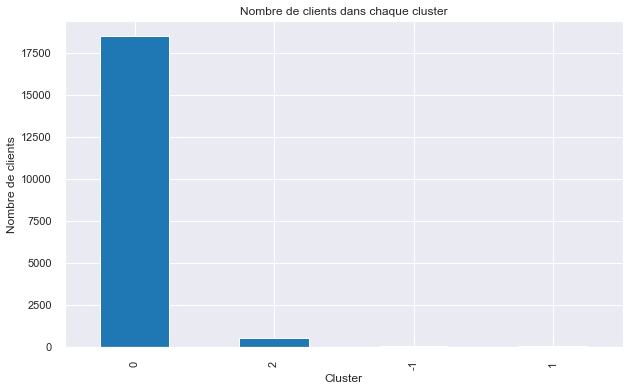

In [92]:
import matplotlib.pyplot as plt

cluster_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Nombre de clients dans chaque cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre de clients')
plt.show()

# Clustering hiérarchique

Dans le cas du clustering agglomératif (ou bottom-up), on commence par considérer que chaque point est un cluster à lui tout seul. Ensuite, on trouve les deux clusters les plus proches, et on les agglomère en un seul cluster. On répète cette étape jusqu'à ce que tous les points appartiennent à un seul cluster, constitué de l'agglomération de tous les clusters initiaux.

L'approche inverse, le clustering divisif (ou top-down), consiste à initialiser avec un unique cluster contenant tous les points, puis à itérativement séparer chaque cluster en plusieurs, jusqu'à ce que chaque point appartienne à son propre cluster.

Le clustering agglomératif est trop gourmand en mémoire. Je vais travailler sur échantillon de 5000 observations

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
# Échantillonnage aléatoire pour réduire la taille des données
X = RFM.sample(n=5000, random_state=2)
X_cah = X[['rfm_recence', 'rfm_frequence', 'rfm_montant']]
X_scaled = StandardScaler().fit_transform(X_cah)


Un dendrogramme est un arbre dont les feuilles sont les points d'un jeu de données. Chaque nœud de l'arbre représente un cluster (les feuilles sont des clusters contenant un point chacun). Les clusters qui ont le même parent sont agglomérés pour former ce cluster parent. Le niveau de similarité est mesuré le long de l'axe vertical et les différentes observations sont répertoriées le long de l'axe horizontal.

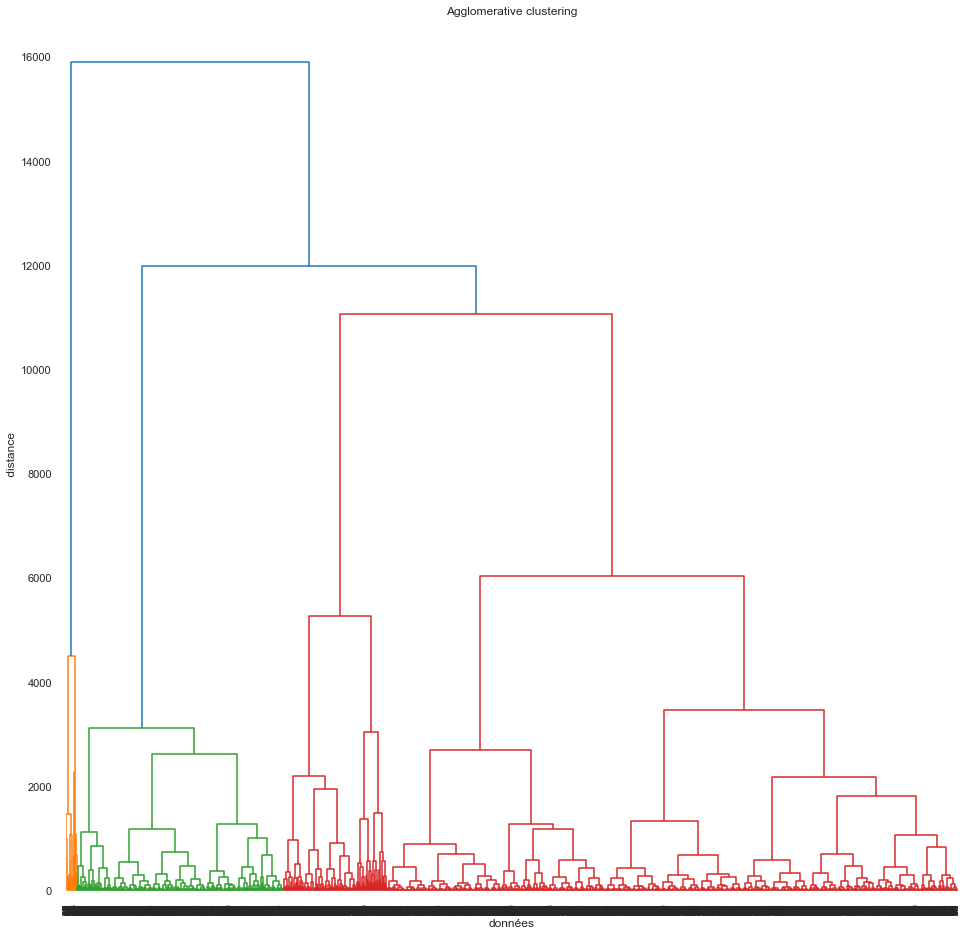

In [27]:
import time
import scipy.cluster.hierarchy as sch
plt.figure(1, figsize=(16, 16))
start_dendo = time.time()
dendrogram = sch.dendrogram(sch.linkage(
                            X_cah.sample(5000),
                            method="ward"))
plt.title('Agglomerative clustering')
plt.xlabel('données')
plt.ylabel(' distance')
plt.show()

En analysant le dendrogramme, on peut penser qu'une découpe vers l'ordonnée 8000 serait une bonne découpe, on obtiendrait alors un clustering qui se rapprochent de celui obtenue par le k-means avec 4 clusters.

**Etude des clusters de CAH**

In [28]:
# Calculons le coefficient de silhouette pour différentes valeurs de 
#'n_clusters' de l'AgglomerativeClustering
# afin de voir si on obtient ce même résultat de 7 clusters.

1:80: E501 line too long (110 > 79 characters)


In [31]:
silhouettes = []

for num_clusters in range(2, 11):
    hierarchical_clust = AgglomerativeClustering(n_clusters=num_clusters)
    hierarchical_clust.fit(X_scaled)
    silh = silhouette_score(X_scaled, hierarchical_clust.labels_)
    silhouettes.append(silh)

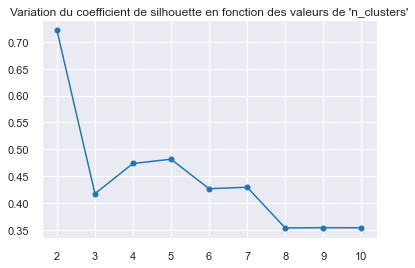

4:80: E501 line too long (91 > 79 characters)


In [32]:
# On affiche les résultats sur un graphique pour le coefficient de silhouette.

plt.plot(range(2, 11), silhouettes, marker="o")
plt.title(
    "Variation du coefficient de silhouette en fonction des valeurs de 'n_clusters'")
plt.show()

In [46]:
# Analysons maintenant avec 4 clusters :

hierarchical_clust = AgglomerativeClustering(n_clusters=4)
hierarchical_clust.fit(X_scaled)

X["hierarchical_clust"] = hierarchical_clust.labels_

In [47]:
df_labels_h = pd.pivot_table(
    X,
    index=['hierarchical_clust'],
    values=[
        "rfm_recence",
        "rfm_frequence",
        "rfm_montant",
    ],
    aggfunc={
        "rfm_recence": np.mean,
        "rfm_frequence": np.mean,
        "rfm_montant": np.mean,
    },
)

In [48]:
df_labels_h

,rfm_frequence,rfm_montant,rfm_recence
hierarchical_clust,,,
0,1.003145,801.934371,234.248428
1,2.146667,287.249267,230.826667
2,1.000000,117.525779,377.384332
3,1.000000,120.241211,121.101609


In [53]:
# Nombre de clients par cluster :
cluster_counts = X['hierarchical_clust'].value_counts()
cluster_counts

3    2362
2    2170
0     318
1     150
Name: hierarchical_clust, dtype: int64

In [59]:
# Proportion de clients par cluster :

(
    X["hierarchical_clust"].value_counts()
    / X["hierarchical_clust"].size
).sort_values(ascending=False)

3    0.4724
2    0.4340
0    0.0636
1    0.0300
Name: hierarchical_clust, dtype: float64

**Visualisation**

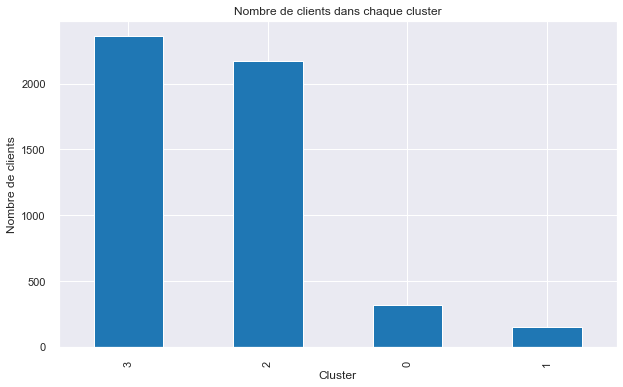

In [55]:
import matplotlib.pyplot as plt

cluster_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Nombre de clients dans chaque cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre de clients')
plt.show()

# Conclusion